# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [320]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [321]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)

df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [322]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row is a dog registered in NYC (as of 2016). Animal Birth is the animal's birthday, and Animal Gender is the dog's sex.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

These all have the caveat of applying only to dogs registered in NYC as of April 2016.

1. How many unvaccinated dogs are registered?
2. What is the most common dog name?
3. What is the average turn around time for license issuing?
4. WHat percentage of dogs are spayed/neutered?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [323]:
df['Primary Breed'].value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [324]:
df[(df['Primary Breed'] != 'Unknown')]['Primary Breed'].value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

## What are the most popular dog names?

In [325]:
df[(df['Animal Name'] != 'Unknown') & (df['Animal Name'] != 'UNKNOWN')]['Animal Name'].value_counts()

Max              202
Bella            193
Charlie          172
Lola             146
Rocky            140
                ... 
Bluno              1
DARBY              1
CHARLEY VIVAR      1
TINY               1
Squeeze            1
Name: Animal Name, Length: 13719, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [326]:
df[df['Animal Name'] == 'Jake']['Animal Name'].value_counts()

Jake    34
Name: Animal Name, dtype: int64

In [327]:
df[df['Animal Name'] == 'Max']['Animal Name'].value_counts()

Max    202
Name: Animal Name, dtype: int64

In [328]:
df[df['Animal Name'] == 'Maxwell']['Animal Name'].value_counts()

Maxwell    11
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [329]:
df['Guard or Trained'].value_counts(normalize=True)

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [330]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [331]:
# It is not! You need to tell .value_counts to keep those na values

df['Guard or Trained'].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [332]:
df['Guard or Trained'] = df["Guard or Trained"].replace({
    None: 'No'
})

df['Guard or Trained'].value_counts(dropna=False)

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [333]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

Unknown                       5
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [334]:
years = []

years = df['Animal Birth'].apply(lambda birth: birth.year)

df['Year'] = years

df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [335]:
age = []

age = 2022 - df['Year']

df['Age'] = age

df['Age'].median()

12.0

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [336]:
df2 = pd.read_csv('zipcodes-neighborhoods.csv')

df = df.join(df2.set_index('zip'),on='Owner Zip Code')
df.head(20)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,Age,neighborhood,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9,Southeast Bronx,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8,Greenwich Village and Soho,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14,Upper West Side,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8,Greenwich Village and Soho,Manhattan
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013,9,Greenwich Village and Soho,Manhattan
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014,8,East Harlem,Manhattan
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010,12,Southeast Bronx,Bronx
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012,10,Greenwich Village and Soho,Manhattan
9,10013,IAN,M,Unknown,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006,16,Greenwich Village and Soho,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [337]:
df[df.borough == 'Bronx']['Animal Name'].value_counts()

Bella                   22
Max                     21
Rocky                   20
Unknown                 16
Lucky                   15
                        ..
General                  1
BAILEY                   1
Spice Shiloh Carwell     1
Jackie E.                1
toby                     1
Name: Animal Name, Length: 2032, dtype: int64

In [338]:
df[df.neighborhood == 'Upper East Side']['Animal Name'].value_counts()

Charlie    19
Bella      12
NO NAME    11
Lucy       10
Lola       10
           ..
Jogi        1
Peeby       1
Carly       1
Caddock     1
KILO        1
Name: Animal Name, Length: 1383, dtype: int64

In [339]:
df[df.borough == 'Brooklyn']['Animal Name'].value_counts()

Unknown      97
Max          46
UNKNOWN      45
Bella        45
unknown      45
             ..
EMMIE         1
Jimmi         1
Clifford      1
Amanda        1
Beckett       1
Name: Animal Name, Length: 4539, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [340]:
df[df['Primary Breed'] != 'Unknown'].groupby('neighborhood')['Primary Breed'].describe()

,count,unique,top,freq
neighborhood,,,,
Borough Park,531,99,Yorkshire Terrier,49
Bronx Park and Fordham,305,61,Yorkshire Terrier,39
Bushwick and Williamsburg,525,101,Yorkshire Terrier,47
Canarsie and Flatlands,456,92,Shih Tzu,56
Central Bronx,231,52,Yorkshire Terrier,29
Central Brooklyn,621,119,Shih Tzu,52
Central Harlem,453,92,Chihuahua,48
Central Queens,259,61,Yorkshire Terrier,34
Chelsea and Clinton,1302,132,Chihuahua,80


## What breed of dogs are the least likely to be spayed? Male or female?

In [341]:

# Found rank in the documentation for dataframes. Not sure if that's the best way to go about it

df[(df['Primary Breed'] != 'Unknown')].groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).rank().sort_values()


Primary Breed                  Spayed or Neut
Bassett Hound                  No                  1.0
Greyhound                      No                  2.0
German Shepherd Crossbreed     No                  3.0
Welsh Corgi, Cardigan          No                  4.0
Labrador Retriever Crossbreed  No                  5.0
                                                 ...  
Petit Basset Griffon Vendeen   Yes               392.5
Peruvian Inca Orchid           Yes               392.5
Parson Russell Terrier         Yes               392.5
Black and Tan Coonhound        Yes               392.5
Dandie Dinmont Terrier         Yes               392.5
Name: Spayed or Neut, Length: 428, dtype: float64

In [402]:
# There are only three non-recorded genders, I just tossed them

df[df['Animal Gender'] != ' '].groupby('Animal Gender')['Spayed or Neut'].value_counts(normalize=True)

Animal Gender  Spayed or Neut
F              Yes               0.857850
               No                0.142150
M              Yes               0.791856
               No                0.208144
Name: Spayed or Neut, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [343]:
monochrome = 'No'

df['Monochrome'] = monochrome

In [344]:
df.loc[((df['Animal Dominant Color'] == 'Black') | (df['Animal Dominant Color'] == 'White') | (df['Animal Dominant Color'] == 'Grey')) & ((df['Animal Secondary Color'].isna()) & (df['Animal Third Color'].isna())), 'Monochrome'] = 'Yes'

df.Monochrome.value_counts()

No     28609
Yes     1391
Name: Monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot: >

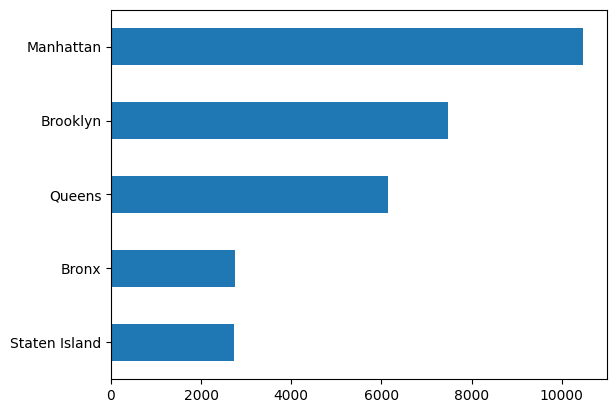

In [345]:

df.borough.value_counts(ascending=True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [346]:
df3 = pd.read_csv('boro_population.csv')

df = df.join(df3.set_index('borough'),on='borough')



In [351]:
df3.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [394]:
# This one is really getting me.

df.loc[:, ['borough', 'Animal Name', 'population']].groupby('borough').describe()

population                                                   \
                   count       mean  std        min        25%        50%   
borough                                                                     
Bronx             2748.0  1455444.0  0.0  1455444.0  1455444.0  1455444.0   
Brooklyn          7466.0  2636735.0  0.0  2636735.0  2636735.0  2636735.0   
Manhattan        10478.0  1644518.0  0.0  1644518.0  1644518.0  1644518.0   
Queens            6154.0  2339150.0  0.0  2339150.0  2339150.0  2339150.0   
Staten Island     2727.0   474558.0  0.0   474558.0   474558.0   474558.0   

                                     
                     75%        max  
borough                              
Bronx          1455444.0  1455444.0  
Brooklyn       2636735.0  2636735.0  
Manhattan      1644518.0  1644518.0  
Queens         2339150.0  2339150.0  
Staten Island   474558.0   474558.0

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

<AxesSubplot: ylabel='borough,Primary Breed'>

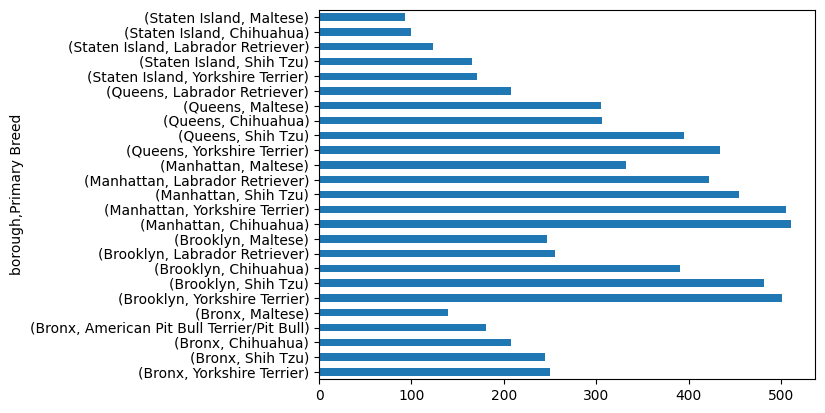

In [349]:
# Stack Overflow original here, have never encountered the level parameter

df[df['Primary Breed'] != 'Unknown'].groupby('borough')['Primary Breed'].value_counts().groupby(level=0).head().plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [350]:
df['Guard or Trained'].value_counts(normalize=True) *100

No     99.943333
Yes     0.056667
Name: Guard or Trained, dtype: float64